# U.S. Medical Insurance Costs

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


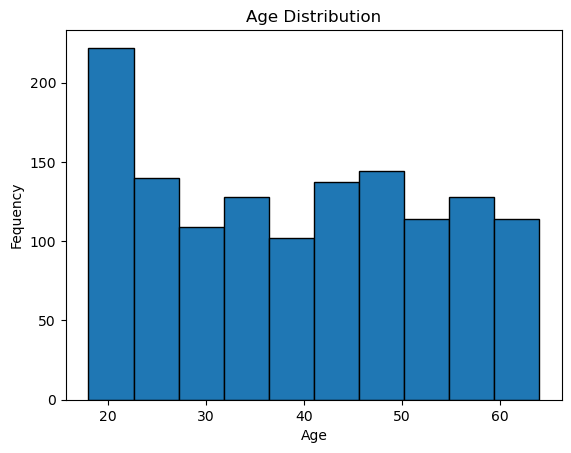

{'bmi_charges_correlation': 0.19834096883362884,
 'bmi_statistics': {'mean': 30.66339686098655,
                    'median': 30.4,
                    'std_dev': 6.0959076415894256},
 'charges_statistics': {'mean': 13270.422265141257,
                        'median': 9382.033,
                        'std_dev': 12105.484975561612}}
{'age': 0.29900819333064765,
 'bmi': 0.19834096883362884,
 'children': 0.06799822684790482,
 'smoker_numeric': 0.7872514304984766}
Gender Distribution (%):
 male      50.523169
female    49.476831
Name: sex, dtype: float64

Smoker Distribution (%):
 no     79.521674
yes    20.478326
Name: smoker, dtype: float64

Regional Distribution (%):
 southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: region, dtype: float64
[27.9, 33.77, 33.0, 22.705, 28.88]
[16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552]
BMI Stats (Mean, Median, Std Dev): (30.66339686098655, 30.4, 6.0959076415894256)
Charges Stats (Mean, Median,

In [3]:
import pandas as pd

df = pd.read_csv("insurance.csv")

print(df.head())

import numpy as np

def calculate_statistics(data):
    """Returns mean, median, and standard deviation of a given dataset."""
    mean = np.mean(data)
    median = np.median(data)
    std_dev = np.std(data)
    return mean, median, std_dev


def calculate_correlation(x, y):
    """Returns the correlation coefficient between two lists."""
    correlation = np.corrcoef(x, y)[0, 1]
    return correlation

# Convert categorical smoker column to numerical values (yes = 1, No = 0)
df["smoker_numeric"] = df["smoker"].map({"yes": 1, "no": 0})

# Select relevent numerical columns
features = ["age", "bmi", "children", "smoker_numeric"]
correlations = {}

# Calculate correlation for each feature with medical charges
for feature in features:
    correlations[feature] = calculate_correlation(df[feature], df["charges"])
    


# Gender Distribution
gender_counts = df["sex"].value_counts(normalize=True) * 100

# Smoker Distribution
smoker_counts = df["smoker"].value_counts(normalize=True) * 100

# Regional Distribution
region_counts = df["region"].value_counts(normalize=True) * 100

# Age Distribution (Histogram to see if ages are evenly spread)
import matplotlib.pyplot as plt
plt.hist(df["age"], bins=10, edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Fequency")
plt.title("Age Distribution")
plt.show()


bmi = df["bmi"].tolist() #Converts the BMI column into a list
charges = df["charges"].tolist() #Converts the charges column into a list
bmi_charges_correlation = calculate_correlation(bmi, charges) #calculates correlation coeficient between two lists
bmi_stats = calculate_statistics(bmi)
charges_stats = calculate_statistics(charges)
correlations = dict(sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True))

# Dictionary to store key findings
analysis_results = {
    "bmi_statistics": {
        "mean": calculate_statistics(bmi)[0],
        "median": calculate_statistics(bmi)[1],
        "std_dev": calculate_statistics(bmi)[2]
    },
    "charges_statistics": {
        "mean": calculate_statistics(charges)[0],
        "median": calculate_statistics(charges)[1],
        "std_dev": calculate_statistics(charges)[2]
    },
    "bmi_charges_correlation": bmi_charges_correlation
}

import pprint
pprint.pprint(analysis_results)
pprint.pprint(correlations)

print("Gender Distribution (%):\n", gender_counts)
print("\nSmoker Distribution (%):\n", smoker_counts)
print("\nRegional Distribution (%):\n", region_counts)
print(bmi[:5])
print(charges[:5])
print("BMI Stats (Mean, Median, Std Dev):", bmi_stats)
print("Charges Stats (Mean, Median, Std Dev):", charges_stats)
print("Correlation between BMi and Charges:", bmi_charges_correlation)